In [ ]:
! pip install torch torchvision
! p

# Lenet-5 for fashion mnist

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# fasion-MNIST dataset

the fasion-MNIST dataset is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends fasion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

## loading the dataset
The dataset can be used from `torchvision.datasets` package. The dataset is downloaded from the internet and saved in the `data` directory. The dataset is loaded using the `torch.utils.data.DataLoader` class. The `DataLoader` class is used to load the data in batches. The `DataLoader` class takes the dataset and the batch size as input and provides an iterator to iterate over the dataset in batches.


## Transforms
### resize:
 The images in the fasion-MNIST dataset are of size 28x28. So, it makes sense to use the `transforms.Resize` to convert the images to a size that is compatible with the LeNet-5 architecture's input. The LeNet-5 architecture expects images of size 32x32 as input.
the original size of the images in the MNIST dataset is 28x28.

### ToTensor:
The `transforms.ToTensor` converts the images to PyTorch tensors. The images in the fasion-MNIST dataset are of type `PIL.Image.Image`. The `transforms.ToTensor` converts the images to PyTorch tensors of shape `(C, H, W)` where `C` is the number of channels, `H` is the height of the image, and `W` is the width of the image. The images in the fasion-MNIST dataset are grayscale images, so the number of channels is 1. The shape of the images after applying the `transforms.ToTensor` is `(1, 32, 32)`.


In [3]:
fasion_mnist_train = datasets.FashionMNIST('data', train=True, download=True, transform=transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
]))

100%|██████████| 26421880/26421880 [00:20<00:00, 1275174.78it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 505023.45it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 7054008.29it/s] 


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5207978.05it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



## Test dataset

In [47]:
fasion_mnist_test = datasets.FashionMNIST('data', train=False, download=True, transform=transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
]))

## Visualize the dataset
let's draw 5 random images from the dataset and visualize them. The images are grayscale images of size 32x32. The images are converted to PyTorch tensors of shape `(1, 32, 32)` using the `transforms.ToTensor` transform. The images are then visualized using the `matplotlib.pyplot.imshow` function. we can also decode the labels to see how the images are labeled.

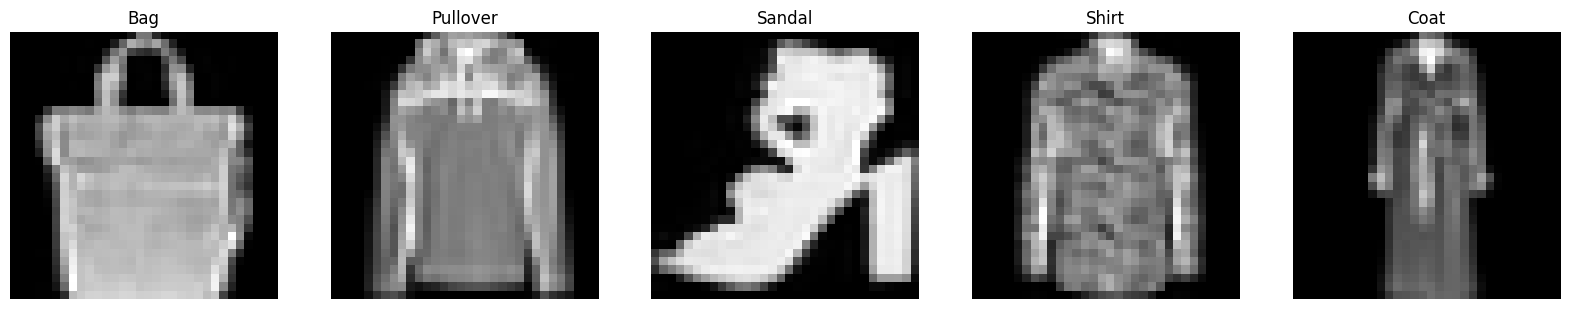

In [42]:
# get 5 images
imgs = [0]*5
labels = [0]*5
for idx, i in enumerate(np.random.randint(0, len(fasion_mnist_train), 5)):
    imgs[idx], labels[idx] = fasion_mnist_train[i]

#visualize the 5 image
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    ax[i].imshow(imgs[i].permute(1, 2, 0), cmap='gray')
    ax[i].set_title(fasion_mnist_train.classes[labels[i]])
    ax[i].axis('off')
    #decode the label
    label = fasion_mnist_train.classes[labels[i]]


markdown bold text -

# LeNet-5 Architecture
The LeNet-5 architecture is a convolutional neural network architecture proposed by Yann LeCun in 1998. The LeNet-5 architecture consists of 7 layers. The architecture of the LeNet-5 is as follows:

#### **input layer:**
The input to the LeNet-5 architecture is a grayscale image of size 32x32.

#### Convolution & Average Pooling Layers:
next, the input image is passed through a convolutional layer followed by an average pooling layer.
The convolutional layer has 6 filters of size 5x5.
- **kernel size:** 5x5
-  **output channels:** 6
- **stride:** 1
The average pooling layer has a filter of size 2x2.
- **kernel size:** 2x2
- **stride:** 2

#### 2nd Convolution & Average Pooling Layers:
The output from the first average pooling layer is passed through another convolutional layer followed by another average pooling layer.
The convolutional layer has 16 filters of size 5x5.
- **kernel size:** 5x5
- **output channels:** 16
- **stride:** 1
average pooling layer has a filter of size 2x2.
- **kernel size:** 2x2
- **stride:** 2

#### convolutional layer:
The output from the second average pooling layer is passed through another convolutional layer.
- **kernel size:** 5x5
- **output channels:** 120
- **stride:** 1

#### Fully Connected Layers:
The output from the last convolutional layer is flattened and passed through 3 fully connected layers:
- **1st fully connected layer:** $120 \rightarrow 84$
- **2nd fully connected layer:** $84 \rightarrow 10$
#### Output Layer:
The output from the last fully connected layer is passed through a softmax activation function to get the best of 10 class probabilities.



In [ ]:
# class LeNet = nn.s

In [45]:
class Lenet5(nn.Module):
    def __init__(self):
        super(Lenet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        self.softmax = nn.Softmax(dim=1)
# LeNet = nn.Sequential(
#     nn.Conv2d(1, 6, kernel_size=5, stride=1),
#     nn.Tanh(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
#     nn.Conv2d(6, 16, kernel_size=5, stride=1),
#     nn.Tanh(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
#     nn.Conv2d(16, 120, kernel_size=5, stride=1),
#     nn.Tanh(),
#     nn.Flatten(),
#     nn.Linear(120, 84),
#     nn.Tanh(),
#     nn.Linear(84, 10),
#     nn.Softmax(dim=1)
# )

# Training the model

# Training the model

In [49]:
# hyperparameters
batch_size = 256
learning_rate = 0.01
epochs = 10
dropout = 0.5
weight_decay = 0.0001
batch_norm = False

# training the model
train_loader = DataLoader(fasion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fasion_mnist_test, batch_size=batch_size, shuffle=False)
model = LeNet
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
model.train()

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (7): Tanh()
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Tanh()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): Softmax(dim=1)
)